# Problem 2, Parts C-E: Neural Network

In this Jupyter notebook, we will train a neural network on the MiniBooNE dataset.

Use this notebook to write your code for problem 1 parts C-E by filling in the sections marked `# TODO` and running all cells.

In [11]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [12]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])
optimizer = keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

preds_nn = model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, preds_nn)
roc_auc = auc(fpr, tpr)

# Binary predictions for accuracy
y_pred_labels = (preds_nn > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_labels)

print(f"AUC: {roc_auc:.4f}")
print(f"Accuracy: {acc:.4f}")


Epoch 1/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - accuracy: 0.8460 - loss: 0.3548 - val_accuracy: 0.8348 - val_loss: 0.3617
Epoch 2/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8470 - loss: 0.3479 - val_accuracy: 0.8622 - val_loss: 0.3355
Epoch 3/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.8508 - loss: 0.3420 - val_accuracy: 0.8324 - val_loss: 0.3629
Epoch 4/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.8437 - loss: 0.3565 - val_accuracy: 0.8580 - val_loss: 0.3447
Epoch 5/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8451 - loss: 0.3555 - val_accuracy: 0.8395 - val_loss: 0.3620
Epoch 6/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8433 - loss: 0.3590 - val_accuracy: 0.8119 - val_loss: 0.3815
Epoch 7/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.8443 - loss: 0.3573 - val_accuracy: 0.8221 - val_loss: 0.3721
Epoch 8/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.8422 - loss: 0.3623 - va

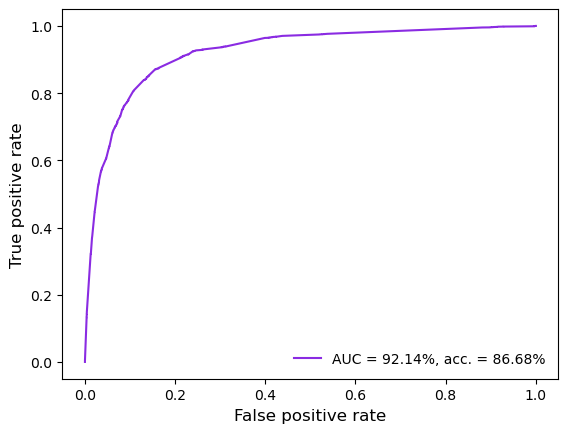

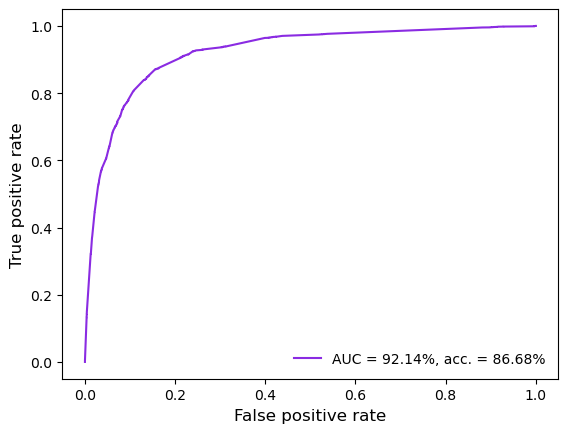

In [13]:
from roc_helper import plot_roc

plot_roc(y_test, preds_nn)

In [15]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(1, activation='sigmoid')
])
optimizer = keras.optimizers.SGD(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train.astype('float64'), y_train.astype('float64'),
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

preds_nn = model.predict(X_test.astype('float64'))

fpr, tpr, _ = roc_curve(y_test, preds_nn)
roc_auc = auc(fpr, tpr)

y_pred_labels = (preds_nn > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_labels)

print(f"AUC: {roc_auc:.4f}")
print(f"Accuracy: {acc:.4f}")



Epoch 1/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.7686 - loss: 200.8287 - val_accuracy: 0.8508 - val_loss: 0.8158
Epoch 2/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - accuracy: 0.8267 - loss: 1.9971 - val_accuracy: 0.7919 - val_loss: 0.9435
Epoch 3/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.8400 - loss: 1.6032 - val_accuracy: 0.8270 - val_loss: 0.5921
Epoch 4/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.8494 - loss: 1.5059 - val_accuracy: 0.8740 - val_loss: 0.3440
Epoch 5/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.8566 - loss: 0.9811 - val_accuracy: 0.8621 - val_loss: 0.3660
Epoch 6/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.8614 - loss: 1.6278 - val_accuracy: 0.8078 - val_loss: 0.5820
Epoch 7/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.8652 - loss: 1.0610 - val_accuracy: 0.8724 - val_loss: 0.3364
Epoch 8/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.8683 - loss: 0.8027 

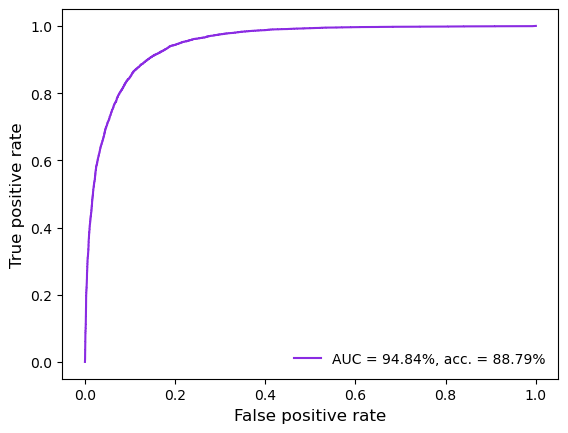

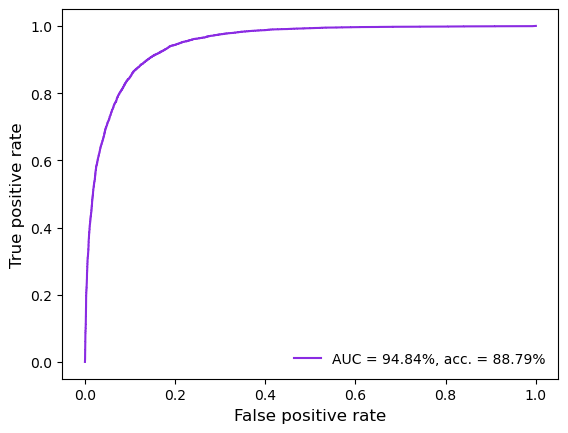

In [16]:
plot_roc(y_test, preds_nn)

In [18]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train).astype('float32')
X_test_scaled = scaler.transform(X_test).astype('float32')


inputs = keras.Input(shape=(X_train.shape[1],))
x = keras.layers.Dense(128, activation='relu')(inputs)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    X_train_scaled, y_train.astype('float32'),
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Predictions on scaled test set
preds_nn = model.predict(X_test_scaled)

Epoch 1/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.8913 - loss: 0.2603 - val_accuracy: 0.9014 - val_loss: 0.2259
Epoch 2/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.9085 - loss: 0.2151 - val_accuracy: 0.9112 - val_loss: 0.2109
Epoch 3/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.9148 - loss: 0.2023 - val_accuracy: 0.9173 - val_loss: 0.1958
Epoch 4/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.9204 - loss: 0.1920 - val_accuracy: 0.9222 - val_loss: 0.1888
Epoch 5/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.9242 - loss: 0.1845 - val_accuracy: 0.9253 - val_loss: 0.1824
Epoch 6/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.9257 - loss: 0.1801 - val_accuracy: 0.9171 - val_loss: 0.1995
Epoch 7/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.9276 - loss: 0.1769 - val_accuracy: 0.9277 - val_loss: 0.1777
Epoch 8/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.9298 - loss: 0.1716 - 

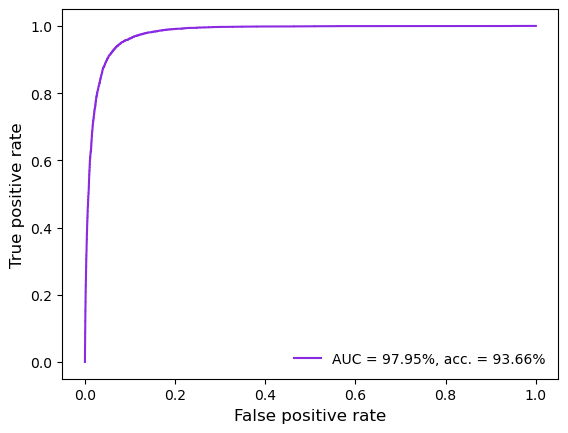

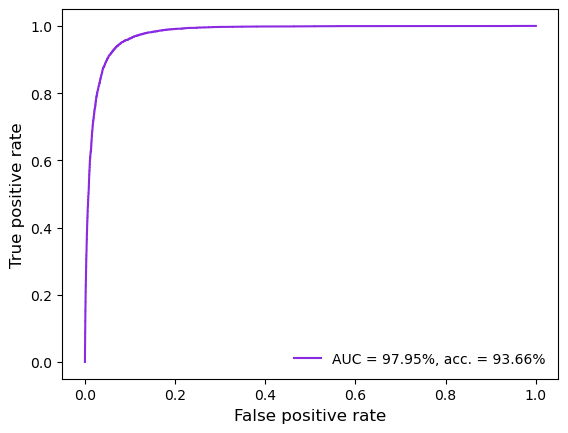

In [19]:
plot_roc(y_test, preds_nn)